### Machine Learning for Data Quality Prediction
**Description**: Use a machine learning model to predict data quality issues.

**Steps**:
1. Create a mock dataset with features and label (quality issue/label: 0: good, 1: issue).
2. Train a machine learning model.
3. Evaluate the model performance.

Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3

Confusion Matrix:
 [[1 0]
 [1 1]]


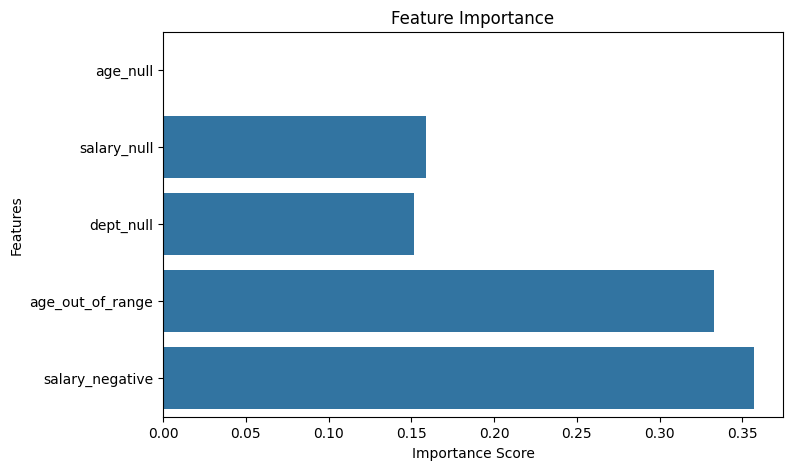

In [1]:
# write your code from here
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Simulate or Load Dataset
try:
    # Create synthetic data with quality issues
    data = pd.DataFrame({
        'age': [25, np.nan, 22, 45, 38, -5, 999, 30],
        'salary': [50000, 60000, np.nan, 70000, -1000, 90000, 120000, 45000],
        'department': ['HR', 'IT', None, 'Finance', 'HR', 'IT', 'HR', 'Finance']
    })
except Exception as e:
    print("Failed to load data:", e)

# Step 2: Add Labels (1 = bad quality row, 0 = good)
def detect_quality_issues(row):
    if pd.isnull(row['age']) or pd.isnull(row['salary']) or pd.isnull(row['department']):
        return 1
    if row['age'] < 0 or row['age'] > 100:
        return 1
    if row['salary'] < 0:
        return 1
    return 0

data['quality_issue'] = data.apply(detect_quality_issues, axis=1)

# Step 3: Feature Engineering
data['age_null'] = data['age'].isnull().astype(int)
data['salary_null'] = data['salary'].isnull().astype(int)
data['dept_null'] = data['department'].isnull().astype(int)
data['age_out_of_range'] = ((data['age'] < 0) | (data['age'] > 100)).astype(int)
data['salary_negative'] = (data['salary'] < 0).astype(int)

features = ['age_null', 'salary_null', 'dept_null', 'age_out_of_range', 'salary_negative']
target = 'quality_issue'

# Step 4: Train/Test Split
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Train Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 6: Evaluate Model
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 7: Visualize Feature Importance
importance = pd.Series(model.feature_importances_, index=features)
plt.figure(figsize=(8, 5))
sns.barplot(x=importance, y=importance.index)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()
